# Logistic Regression
Logistic regression is a method that can be used to classify objects into different categories, given a set of features (variables) associated with each object.

In this tuturial, we will continue with the data set of US Wildfires from 1990 - 2016 that we used in the preprocessing tutorial. This data set includes the location and time of 50,000 recent wildfires, as well as information about the type of vegetation and co-located meteorological data during the time when the fires occurred. It is a subset of a much larger data set of 1.8 million US Wildfires.

The data set is available on Kaggle: [US Wildfires and other attributes](https://www.kaggle.com/datasets/capcloudcoder/us-wildfire-data-plus-other-attributes?select=Wildfire_att_description.txt)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("michaelbryantds/tornadoes")

print("Path to dataset files:", path)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.73M/1.73M [00:00<00:00, 8.80MB/s]

Extracting model files...
Path to dataset files: /Users/karalamb/.cache/kagglehub/datasets/michaelbryantds/tornadoes/versions/1


In [5]:
import os
os.listdir(path)

['SPC_severe_database_description.pdf', '1950-2021_all_tornadoes.csv']

In [7]:
import pandas as pd

tornadodb = pd.read_csv(os.path.join(path,'1950-2021_all_tornadoes.csv'))

In [8]:
tornadodb

,om,yr,mo,dy,date,time,tz,st,stf,stn,...,len,wid,ns,sn,sg,f1,f2,f3,f4,fc
0,192,1950,10,1,1950-10-01,21:00:00,3,OK,40,23,...,15.80,10,1,1,1,25,0,0,0,0
1,193,1950,10,9,1950-10-09,02:15:00,3,NC,37,9,...,2.00,880,1,1,1,47,0,0,0,0
2,195,1950,11,20,1950-11-20,02:20:00,3,KY,21,1,...,0.10,10,1,1,1,177,0,0,0,0
3,196,1950,11,20,1950-11-20,04:00:00,3,KY,21,2,...,0.10,10,1,1,1,209,0,0,0,0
4,197,1950,11,20,1950-11-20,07:30:00,3,MS,28,14,...,2.00,37,1,1,1,101,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68863,620523,2021,9,8,2021-09-08,15:32:00,3,PA,42,0,...,0.73,30,1,1,1,109,0,0,0,0
68864,620524,2021,9,8,2021-09-08,15:35:00,3,PA,42,0,...,1.45,30,1,1,1,109,0,0,0,0
68865,620525,2021,9,8,2021-09-08,19:08:00,3,FL,12,0,...,1.45,50,1,1,1,129,0,0,0,0
68866,620526,2021,9,9,2021-09-09,02:10:00,3,CT,9,0,...,0.75,75,1,1,1,13,0,0,0,0


In [9]:
tornadodb.columns

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt

/opt/anaconda3/envs/ML4Climate2025/lib/python3.8/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(20.0, 50.0)

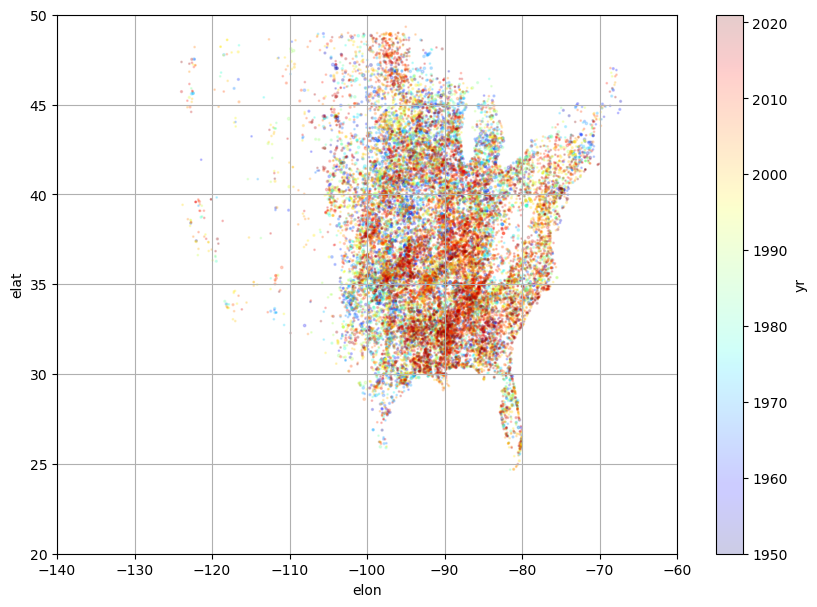

In [19]:
tornadodb.plot(kind="scatter",x="elon",y="elat",grid=True,alpha=0.2,cmap='jet',s='mag',c='yr',colorbar=True,figsize=(10,7))
plt.xlim(-140,-60)
plt.ylim(20,50)